In [1]:
wt = "DISGINASVVNIQKEIDRLNEVAKNLNESLI"

# We'll start by defining reasonable sets of amino acids:
polar_noCY = set("NQST")
polar_noC = set("NQSTY")
polar_orG_noC = set("GNQSTY")
polar_oracidic_noC = set("DENQSTY")
polar_small_noC = set("ST")
small_noCGP = set("AST")
neutral_noCGW = set("AFILMNQSTVY")
basic = set("HKR")
basic_large = set("KR")
acidic = set("DE")
hydrophobic_noGPW = set("AFILMV")
hydrophobic_large = set("FILMVW")
hydrophobic_large_noW = set("FILMV")
hydrophobic_small_noGP = set("AV")
polar_oracidic_orbasic_noC = set("DEHKNQRSTY")

In [2]:
import itertools as it

# Now we'll make a list of the reasonable amino acids for each site
# by copying the sets, so we can modify the elements individually:
possible_mutations = [acidic.copy(),
                      hydrophobic_large_noW.copy(),
                      polar_noCY.copy(),
                      polar_orG_noC.copy(),
                      hydrophobic_large_noW.copy(),
                      polar_oracidic_noC.copy(),
                      hydrophobic_small_noGP.copy(),
                      polar_small_noC.copy(),
                      polar_oracidic_noC.copy(),
                      hydrophobic_noGPW.copy(),
                      polar_oracidic_noC.copy(),
                      hydrophobic_large_noW.copy(),
                      polar_noCY.copy(),
                      polar_oracidic_orbasic_noC.copy(),
                      set("E"),
                      hydrophobic_large_noW.copy(),
                      polar_oracidic_noC.copy(),
                      basic_large.copy(),
                      hydrophobic_large.copy(),
                      polar_noC.copy(),
                      acidic.copy(),
                      hydrophobic_noGPW.copy(),
                      small_noCGP.copy(),
                      basic.copy(),
                      polar_oracidic_noC.copy(),
                      hydrophobic_large.copy(),
                      polar_oracidic_noC.copy(),
                      acidic.copy(),
                      small_noCGP.copy(),
                      neutral_noCGW.copy(),
                      hydrophobic_large.copy()]

# We'll discard the wild-type amino acid from the set of
# possible mutations at each site:
for i, char in enumerate(wt):
  possible_mutations[i].discard(char)
print(possible_mutations)

mutation_sites = list(range(len(wt)))
mutation_sites.remove(14) # no mutations considered at GLU-only position

[{'E'}, {'F', 'M', 'L', 'V'}, {'Q', 'T', 'N'}, {'Q', 'S', 'N', 'T', 'Y'}, {'F', 'M', 'L', 'V'}, {'E', 'S', 'D', 'Q', 'T', 'Y'}, {'V'}, {'T'}, {'E', 'S', 'N', 'D', 'Q', 'T', 'Y'}, {'I', 'F', 'M', 'L', 'A'}, {'E', 'S', 'D', 'Q', 'T', 'Y'}, {'F', 'M', 'L', 'V'}, {'T', 'S', 'N'}, {'H', 'E', 'N', 'D', 'R', 'T', 'Y', 'S', 'Q'}, set(), {'F', 'M', 'L', 'V'}, {'E', 'S', 'N', 'Q', 'T', 'Y'}, {'K'}, {'W', 'I', 'F', 'M', 'V'}, {'S', 'Q', 'T', 'Y'}, {'D'}, {'I', 'F', 'M', 'L', 'A'}, {'T', 'S'}, {'H', 'R'}, {'E', 'S', 'D', 'Q', 'T', 'Y'}, {'W', 'I', 'F', 'M', 'V'}, {'E', 'S', 'D', 'Q', 'T', 'Y'}, {'D'}, {'T', 'A'}, {'I', 'F', 'N', 'T', 'A', 'Y', 'M', 'S', 'Q', 'V'}, {'W', 'F', 'M', 'L', 'V'}]


In [3]:
# Let's define a function to generate all mutants of an arbitrary order:
def generate_mutants(num_mutations = 1):
  sequences = []
  for sites in it.combinations(mutation_sites, num_mutations):
    for mutations in it.product(*[possible_mutations[site] for site in sites]):
      sequence = wt[0:sites[0]]
      for i in range(num_mutations - 1):
        sequence += mutations[i] + wt[sites[i] + 1:sites[i + 1]]
      sequence += mutations[-1] + wt[sites[-1] + 1:]
      sequences.append(sequence)
  return sequences

# We can easily keep all mutants up to order 4 in memory (running on Colab):
print("Stored all " + str(len(generate_mutants(1))) + " single mutants")
print("Stored all " + str(len(generate_mutants(2))) + " double mutants")
print("Stored all " + str(len(generate_mutants(3))) + " triple mutants")
print("Stored all " + str(len(generate_mutants(4))) + " quadruple mutants")

Stored all 124 single mutants
Stored all 7350 double mutants
Stored all 277294 triple mutants
Stored all 7479778 quadruple mutants


In [4]:
import numpy as np

# Here's a function to count the number of mutants of arbitrary order
# without actually generating them:
def count_mutants(num_mutations = 1):
  num_mutants = 0
  for sites in it.combinations(mutation_sites, num_mutations):
    num_mutants += np.product([len(possible_mutations[site]) for site in sites])
  return num_mutants

print("There are " + str(count_mutants(8)) + " mutants with 8 mutations")

There are 361446256260 mutants with 8 mutations


In [5]:
import random

def random_combination(iterable, r): # from itertools documentation
  pool = tuple(iterable)
  n = len(pool)
  indices = sorted(random.sample(range(n), r))
  return tuple(pool[i] for i in indices)

def random_product(*args, repeat = 1): # from itertools documentation
  pools = [tuple(pool) for pool in args] * repeat
  return tuple(random.choice(pool) for pool in pools)

# Now, a function to sample a number of mutants of arbitrary order
# without generating them all. In this case, we are sampling uniformly
# over the sites that are mutated, which means that each mutant is not
# equally probable.
def generate_mutant_sample(num_mutations = 1, num_samples = 1):
  sequences = []
  while len(sequences) < num_samples:
    sites = random_combination(mutation_sites, num_mutations)
    mutations = random_product(*[possible_mutations[site] for site in sites])
    sequence = wt[0:sites[0]]
    for i in range(num_mutations - 1):
      sequence += mutations[i] + wt[sites[i] + 1:sites[i + 1]]
    sequence += mutations[-1] + wt[sites[-1] + 1:]
    if sequence not in sequences:
      sequences.append(sequence)
  return sequences

print("A list of 10 random sequences with 10 mutations:")
print(generate_mutant_sample(10,10))

A list of 10 random sequences with 10 mutations:
['EIQGINATVVELQDEITRLNEVAKQFNEALI', 'DMNQINVSVVNIQREIQRWNEVTKNLNETLW', 'EVSGVNASVVNFQKEIDKLYELTKNLYEALI', 'DVSGINASVVTMSKEIDKFSEVTHNLNESNI', 'DISNISVTDVNISKEIDKLNEVAKNLEESYL', 'DISNITVTVMNINKEIDRLNDVAKNWDESLF', 'DISTITATVVNIQKEIQKMNDVAKNLSESYF', 'DISGIQASVVNINYEISRLNEMSKTLEDSFI', 'DMSTINVSVVNIQKELDRMNELTKSLEDSLI', 'EFTGFNATVVQIQKEIDRLNDVTKNVNETLI']


Text(0, 0.5, 'number of unique mutants')

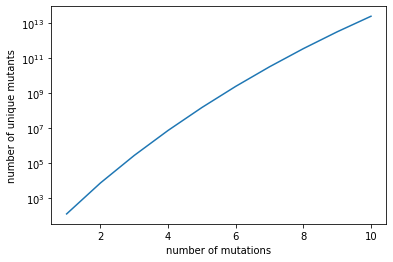

In [6]:
# This cell demonstrates the combinatorial explosion of mutants at high order:
%matplotlib inline
from matplotlib import pyplot as plt

x = np.arange(1, 11)
y = [count_mutants(xval) for xval in x]

plt.plot(x, y)
plt.yscale("log")
plt.xlabel("number of mutations")
plt.ylabel("number of unique mutants")